# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Portland, Oregon, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Portland, Oregon, United States** to Ann Arbor, USA. In that case at least one source file must be about **Portland, Oregon, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Portland, Oregon, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Region and Domain

Region: Portland, Oregon, United States
Domain: Economic activity or measures

# Research Question

How has the unemployment rate for Portland changed over the last decade, compared to the nation as a whole, and does it change in synchrony with the Stock Market or the price of housing?

# Links to data

Portland-Vancouver-Hillsboro Unemployment Rate Data from the U.S. Bureau of Labor Statistics (BOLS)
 * https://beta.bls.gov/dataViewer/view/timeseries/LAUMT413890000000003

United States Unemployment Rate Data (BOLS)
 * https://beta.bls.gov/dataViewer/view/timeseries/LNU04000000

S&P 500 Index from the St. Louis Federal Reserve (FED)
 * https://fred.stlouisfed.org/series/SP500/downloaddata

Purchase Only House Price Index (FED)
 * https://fred.stlouisfed.org/series/HPIPONM226S

# Creating the image

## Imports

In [105]:
# python standard library
import os

# third-party
import matplotlib.pyplot as pyplot
import numpy
import pandas
import requests
import seaborn

## Plot setup

In [106]:
% matplotlib inline
style = seaborn.axes_style("whitegrid")
style["axes.grid"] = False
seaborn.set_style("whitegrid", style)

## Loading the Data

*PORTLAND_DATA* is the unemployment rate data for the Portland - Vancouver (WA) - Hillsboro area.
*NATIONAL_DATA* is the unemployment rate data for the entire United States.
*SP_DATA* is the S&P 500 Index data.
*HOUSING_DATA* is the Purchase Only House Price Index data.

In [107]:
PORTLAND_DATA = "portland_unemployment_data.csv"
NATIONAL_DATA = "national_unemployment.csv"
SP_DATA = "SP500_index.csv"
HOUSING_DATA = "purchase_only_house_price_index.csv"

In [108]:
national_unemployment_url = "https://www.dropbox.com/s/qw2l5hmu061l8x2/national_unemployment.csv?dl=1"
portland_unemployment_url = "https://www.dropbox.com/s/wvux3d7dcaae5t0/portland_unemployment_2007_2017.csv?dl=1"
house_price_url = "https://www.dropbox.com/s/4hu2jpjkhcnr35k/purchase_only_house_price_index.csv?dl=1"
s_and_p_url = "https://www.dropbox.com/s/ojj5zp7feid6wwl/SP500_index.csv?dl=1"

In [109]:
files_urls = ((PORTLAND_DATA, portland_unemployment_url),
              (NATIONAL_DATA, national_unemployment_url),
              (SP_DATA, s_and_p_url),
              (HOUSING_DATA, house_price_url))
for filename, url in files_urls:
    if not os.path.isfile(filename):
        response = requests.get(url)
        with open(filename, "w") as writer:
            writer.write(response.text)

In [110]:
portland = pandas.read_csv(PORTLAND_DATA)
national = pandas.read_csv(NATIONAL_DATA)
s_and_p_index = pandas.read_csv(SP_DATA, na_values=".")
house_price_index = pandas.read_csv(HOUSING_DATA)

The national data has a value for May, while the other metrics don't so I'll delete it.

In [111]:
national.drop([122], inplace=True)

I originally downloaded the data from a different part of the site so the column names changed. This code just maps the ones I use back to the older names, as well as making some easier to remember.

In [112]:
column_renames = {"Value": "unemployment_rate",
                  "Label": "date"}
portland.rename(columns=column_renames,
                inplace=True)
national.rename(columns=column_renames, inplace=True)

Adjusting the house-price index (it only goes back to February 2007).

In [113]:
house_price_index.head()

         DATE  HPIPONM226S
0  2007-02-01       225.36
1  2007-03-01       226.52
2  2007-04-01       226.50
3  2007-05-01       225.40
4  2007-06-01       224.61

In [114]:
house_price_index["price"] = house_price_index.HPIPONM226S
house_price_index["date"] = portland.date[1:].values
pre = pandas.DataFrame({"DATE": ["2007-01-01"], "HPIPONM226S": [numpy.nan], "price": [numpy.nan], "date": ["2007 Jan"]})
house_price_index = pre.append(house_price_index)
house_price_index = house_price_index.reset_index(drop=True)

The S&P index doesn't start until May 2007.

In [115]:
pre = pandas.DataFrame({"DATE": ["2007-01-01", "2007-02-01", "2007-03-01"], "VALUE": [numpy.nan, numpy.nan, numpy.nan]})
s_and_p_index = pre.append(s_and_p_index)
s_and_p_index["date"] = portland.date.values
s_and_p_index = s_and_p_index.reset_index(drop=True)
s_and_p_index.head()

         DATE    VALUE      date
0  2007-01-01      NaN  2007 Jan
1  2007-02-01      NaN  2007 Feb
2  2007-03-01      NaN  2007 Mar
3  2007-04-01      NaN  2007 Apr
4  2007-05-01  1511.14  2007 May

## some extreme values

In [116]:
highest_unemployment = portland.unemployment_rate.max()
unemployment_peaks = numpy.where(portland.unemployment_rate==highest_unemployment)[0]
print(str(portland.date.ix[numpy.where(
    portland.unemployment_rate==highest_unemployment)]))

29    2009 Jun
36    2010 Jan
Name: date, dtype: object


In [117]:
peak = national.unemployment_rate.max()
print(peak)
national_peak = numpy.where(national.unemployment_rate==peak)
print(national.date.iloc[national_peak])

10.6
36    2010 Jan
Name: date, dtype: object


According to the [[https://www.nber.org/cycles.html][National Bureau of Economic Research]], the most recent economic contraction occurred from December 2007 through June 2009 which falls within the data set so I'll highlight that on the plot.

In [118]:
recession_start = numpy.where(portland.date=="2007 Dec")[0][0]
recession_end = numpy.where(portland.date=="2009 Jun")[0][0]
portland_recession_start = portland.unemployment_rate.iloc[recession_start]
print(portland_recession_start)
print(portland.unemployment_rate.iloc[recession_end])

4.8
11.4


In [119]:
national_recession_start = national.unemployment_rate.iloc[recession_start]
post_recession = national[national.Year > 2009]
index = numpy.where(post_recession.unemployment_rate==national_recession_start)[0][0]
post_recession.date.iloc[index]

'2015 Oct'

In [120]:
s_and_p_nadir = s_and_p_index.VALUE.min()
s_and_p_nadir = numpy.where(s_and_p_index.VALUE==s_and_p_nadir)[0]
print(s_and_p_index.date.iloc[s_and_p_nadir])

26    2009 Mar
Name: date, dtype: object


In [121]:
housing_nadir = house_price_index.price.min()
print(housing_nadir)
housing_nadir = numpy.where(house_price_index.price==housing_nadir)[0]
print(house_price_index.date.iloc[housing_nadir])

179.22
52    2011 May
Name: date, dtype: object


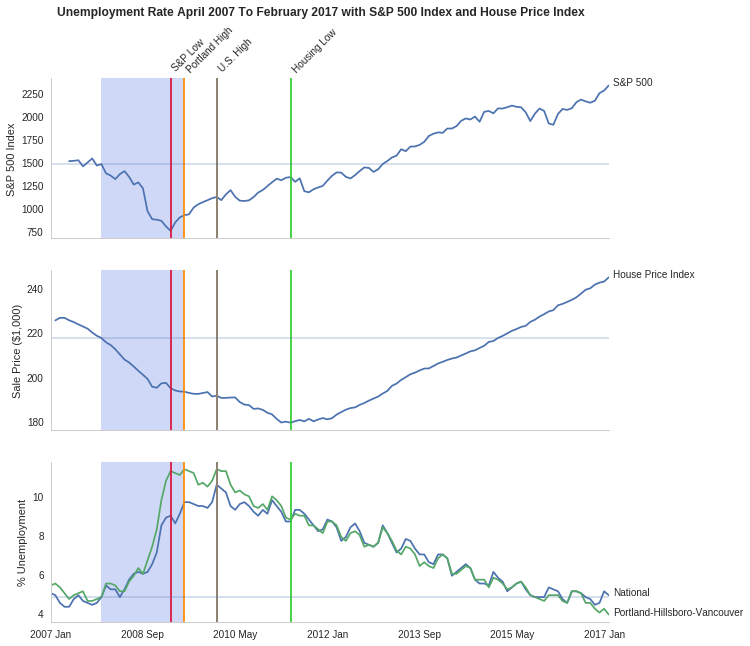

In [123]:
figure , axes = pyplot.subplots(3,
                                sharex=True)
(sp_axe, housing_axe, unemployment_axe) = axes
figure.set_size_inches(10, 10)

# plot the data
s_and_p_index.plot(x="date", y="VALUE", ax=sp_axe,
                   legend=False)
house_price_index.plot(x="date", y="price", ax=housing_axe,
                       legend=False)

national.plot(x="date", y="unemployment_rate", ax=unemployment_axe,
              legend=False)
portland.plot(x="date", y="unemployment_rate", ax=unemployment_axe,
              legend=False)

# plot the peaks/low-points as vertical lines
peak_color = "darkorange"
# portland-unemployment peaks
for peak in unemployment_peaks:
    for axe in axes:
        axe.axvline(peak, color=peak_color)

points = ((s_and_p_nadir, "crimson"),
          (housing_nadir, "limegreen"),
          (national_peak, "grey"))
          
for point, color in points:
    for axe in axes:
        axe.axvline(point, color=color)

# level at the start of the recession (it was the same for both Portland and the U.S.)
unemployment_axe.axhline(national.unemployment_rate.iloc[recession_start], alpha=0.25)
housing_axe.axhline(
    house_price_index.price.iloc[
        numpy.where(house_price_index.date=="2007 Dec")[0][0]], alpha=0.25)
sp_axe.axhline(
    s_and_p_index.VALUE.iloc[
        numpy.where(s_and_p_index.date=="2007 Dec")[0][0]], alpha=0.25)

# add labels 
unemployment_axe.set_ylabel("% Unemployment")
unemployment_axe.set_xlabel("")

housing_axe.set_ylabel("Sale Price ($1,000)")
sp_axe.set_ylabel("S&P 500 Index")

figure.suptitle("Unemployment Rate April 2007 To February 2017 with S&P 500 Index and House Price Index",
                weight="bold")

# label the data lines
last = portland.date.count()
unemployment_axe.text(last, national.unemployment_rate.iloc[-1], "National")
unemployment_axe.text(last, portland.unemployment_rate.iloc[-1], "Portland-Hillsboro-Vancouver")
sp_axe.text(last, s_and_p_index.VALUE.iloc[-1], "S&P 500")
housing_axe.text(last, house_price_index.price.iloc[-1], "House Price Index")

# color in the recession
sp_axe.axvspan(recession_start, recession_end, alpha=0.25, facecolor='royalblue')
housing_axe.axvspan(recession_start, recession_end, alpha=0.25, facecolor='royalblue')
unemployment_axe.axvspan(recession_start, recession_end, alpha=0.25, facecolor='royalblue')

# label the vertical lines
sp_axe.text(s_and_p_nadir, s_and_p_index.VALUE.max() + 450, "S&P Low", rotation=45)
sp_axe.text(unemployment_peaks[0], s_and_p_index.VALUE.max() + 575,  "Portland High", rotation=45)
sp_axe.text(housing_nadir, s_and_p_index.VALUE.max() + 550, "Housing Low", rotation=45)
sp_axe.text(36, s_and_p_index.VALUE.max() + 450, "U.S. High", rotation=45)
seaborn.despine()

# add a caption
# text = figure.text(.1,.000001, """
#    Monthly Unadjusted Unemployment Rates for the Portland-Hillsboro-Vancouver area and the entire United States of America compared with the S&P 500 Index and
#    House Price Index for the same period. The blue highlighted area is a period of economic contraction (December 2007 through June 2009) defined by the National 
#    Bureau of Economic Research. The vertical lines represent (red) the low-point for the S&P 500, (orange) the first peak of the Portland-Hillsboro-Vancouver area 
#    unemployment, (gray) the peak of U.S. unemployment (overlaps second Portland-area value matching its first peak), and (green) the low-point for the house-price index.
#    The horizontal lines are the values for the metrics at the start of the recession.""")

The visualization created was meant to show how Portland, Oregon, United States' unemployment rate related to the national unemployment rate, the stock market, and housing prices. The seasonally unadjusted employment rates for the Portland-Vancouver-Hillsboro area were retrieved from the Bureau of Labor Statistics' web-site, along with the unadjusted unemployment rates for the nation as a whole for the months from January 2017 through February 2017. Hillsboro is an incorporated part of metropolitan Portland and Vancouver is just North of Portland so many of its residents commute to Portland to work, and vice-versa. The monthly S&P 500 Index from May 2007 through February 2017 along with the Purchase Only Price Index from February 2007 through February 2017 were retrieved from the St. Louis Federal Reserve website. The S&P 500 index is the market capitalization of 500 large companies listed on the New York Stock Exchange or NASDAQ. The Purchase Only House Price Index is the average price change in repeat sales or refinancing of the same houses and is maintained by Federal Housing Finance Agency. The begining and ending of the recession within this time period was taken from the National Bureau of Economic Research (https://www.nber.org/cycles.html). The data was plotted with a shared x-axis and three separate y-axes so that the states of each could be compared at the same point in time without distorting the plots due to the differing scales for each metric.

The visualization shows that during the recession, beginning in roughly September 2008, Portland's unemployment rate rose faster than the nation as a whole did, but by roughly May 2011 (coinciding with the lowest valuation for the House Price Index) it had dropped slightly lower than the national rate and has stayed in step with it, although it has thus far not followed the uptick in the national rate that began in November of 2016. Additionally the visualization shows the relative timing of the changes in the three metrics. In the year leading up to the recession, unemployment was relatively flat (ignoring the seasonal changes) and the S&P also began relatively flat but then began a downward trend later in the year, the House Price Index, on the other hand, spent most of it starting what would become a four-year decline (since this was during the sub-prime mortgage crisis, this is perhaps not so surprising). The S&P 500 hit its low point during the recession, as might be expected, but the peaks for the unemployment rates occured when the recession was already over. Also, while the S&P 500 recovered relatively quickly, the unemployment rates for both Portland and the United States as a whole did not reach their level that they were at at the beginning of the recession until October 2015.